# 1. Data Loading
In this section, we will load the dataset and mport necessary files





In [1]:
!pip install pandas matplotlib seaborn scikit-learn xgboost imbalanced-learn

import os

# Step 3: Load the training dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))  # This will list all files in the input folder




# Step 1: Install necessary packages
!pip install pandas matplotlib seaborn scikit-learn xgboost imbalanced-learn

# Step 2: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE  # For SMOTE
from scipy.stats import randint, uniform  # For random distribution in hyperparameter search
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer

from sklearn.metrics import confusion_matrix
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

# Step 3: Load the training dataset
file_path_train = '/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv'
train_df = pd.read_csv(file_path_train)


# Step 4: Load the test dataset
file_path_test = '/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv'
df_test = pd.read_csv(file_path_test)

/kaggle/input/predict-the-success-of-bank-telemarketing/sample_submission.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/train.csv
/kaggle/input/predict-the-success-of-bank-telemarketing/test.csv


# 2. Data Overview
Here, we will explore the basic properties of the dataset, including its shape, data types, and null values.



In [2]:
train_df.head()



,last contact date,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,target
0,2009-04-17,26,blue-collar,married,secondary,no,647,yes,no,cellular,357,2,331,1,other,no
1,2009-10-11,52,technician,married,secondary,no,553,yes,no,telephone,160,1,-1,0,NaN,no
2,2010-11-20,44,blue-collar,married,secondary,no,1397,no,no,cellular,326,1,-1,0,NaN,no
3,2009-09-01,33,admin.,married,secondary,no,394,yes,no,telephone,104,3,-1,0,NaN,no
4,2008-01-29,31,entrepreneur,single,tertiary,no,137,no,no,cellular,445,2,-1,0,NaN,no


In [3]:
print("Dataset Information:")
print(train_df.info())
print("\nSummary Statistics:")
print(train_df.describe())

# Check for missing values
print("\nMissing Values:")
print(train_df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39211 entries, 0 to 39210
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   last contact date  39211 non-null  object
 1   age                39211 non-null  int64 
 2   job                38982 non-null  object
 3   marital            39211 non-null  object
 4   education          37744 non-null  object
 5   default            39211 non-null  object
 6   balance            39211 non-null  int64 
 7   housing            39211 non-null  object
 8   loan               39211 non-null  object
 9   contact            28875 non-null  object
 10  duration           39211 non-null  int64 
 11  campaign           39211 non-null  int64 
 12  pdays              39211 non-null  int64 
 13  previous           39211 non-null  int64 
 14  poutcome           9760 non-null   object
 15  target             39211 non-null  object
dtypes: int64(6), object

# 3. Exploratory Data Analysis (EDA)
In this section, we perform various visualizations and statistical analyses to understand the distribution of numerical and categorical features.



## 3.1  Univariate Analysis for Categorical Columns

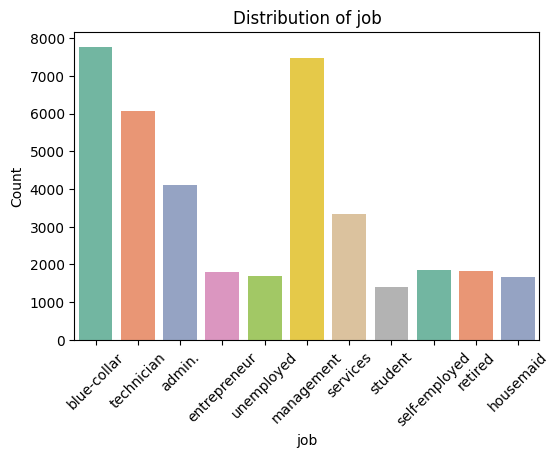

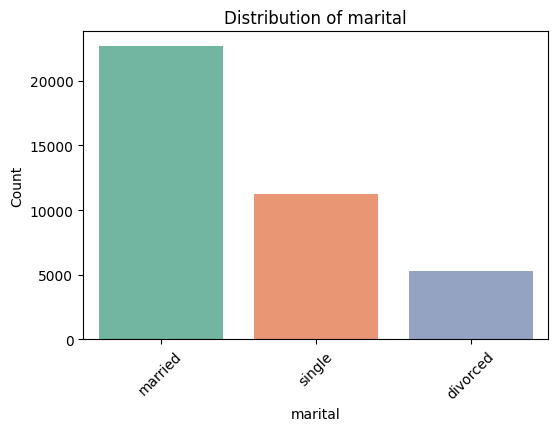

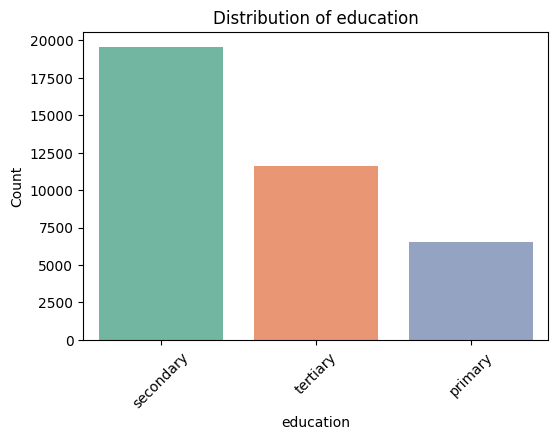

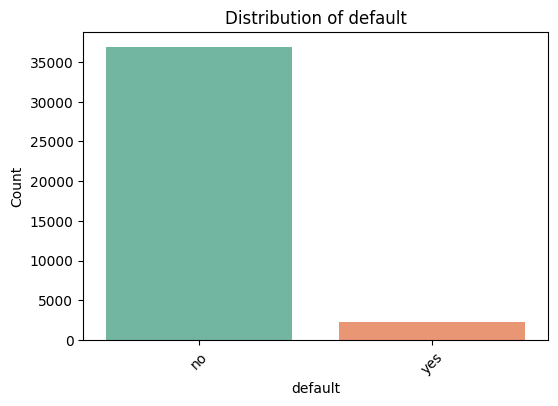

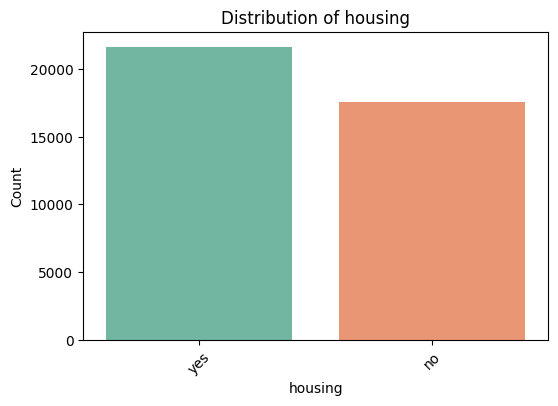

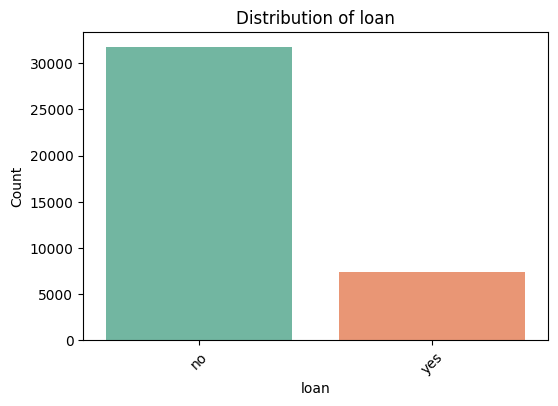

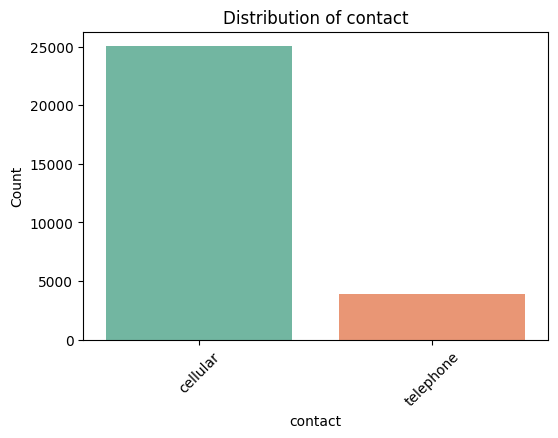

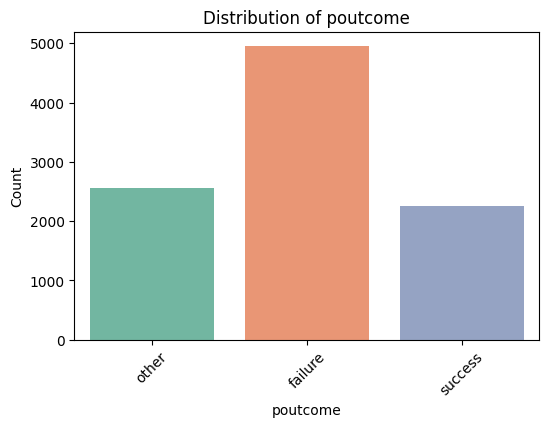

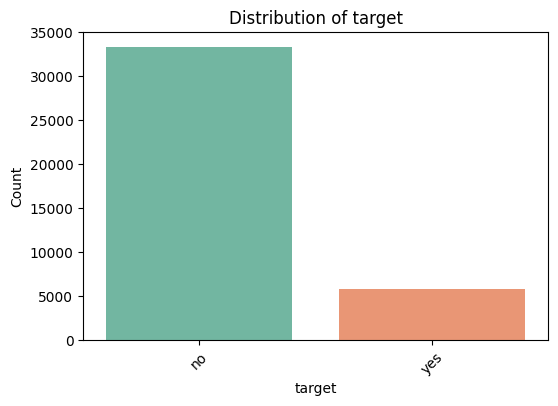

In [4]:
#3.1 EDA


# Univariate Analysis for Categorical Columns
def plot_categorical_distribution(df, categorical_columns, exclude_columns=[]):
    # Explicitly exclude specified columns (e.g., 'last contact date')
    categorical_columns = [col for col in categorical_columns if col not in exclude_columns]
    
    for col in categorical_columns:
        plt.figure(figsize=(6, 4))
        
        # Plot count plot for categorical column
        sns.countplot(x=col, data=df, palette="Set2")
        
        # Title and labels
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        
        # Display the plot
        plt.xticks(rotation=45)  # Rotate labels for better readability if necessary
        plt.show()

# Get the categorical columns
categorical_columns = train_df.select_dtypes(include='object').columns

# Specify the columns you want to explicitly exclude (e.g., 'last contact date')
exclude_columns = ['last contact date']

# Call the function to plot categorical distributions
plot_categorical_distribution(train_df, categorical_columns, exclude_columns)


## 3.2 Distribution of numerical data


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


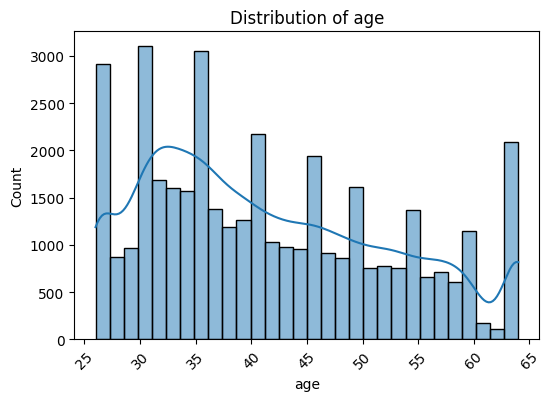

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


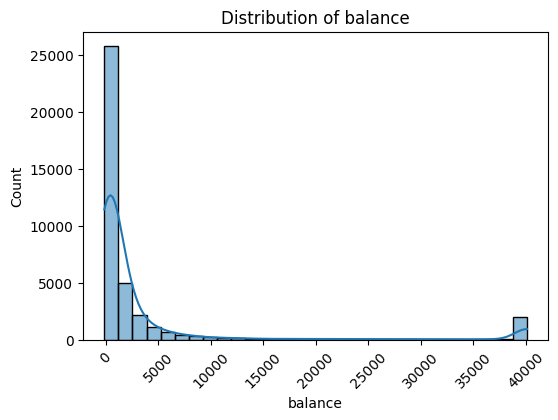

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


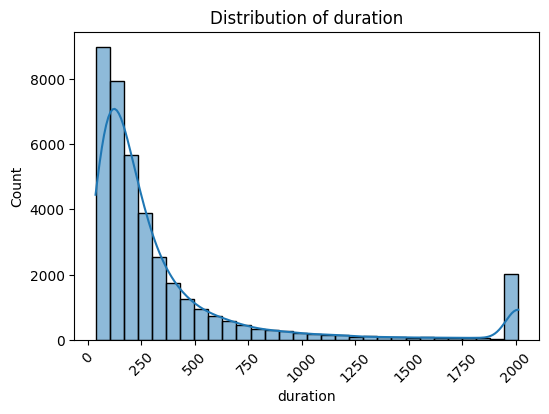

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


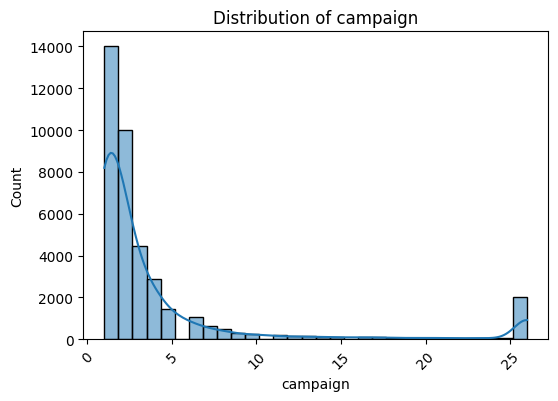

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


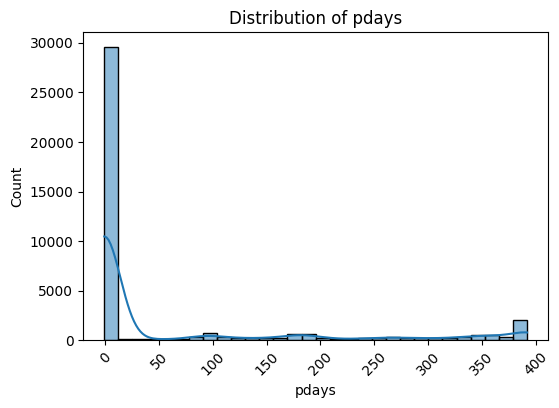

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


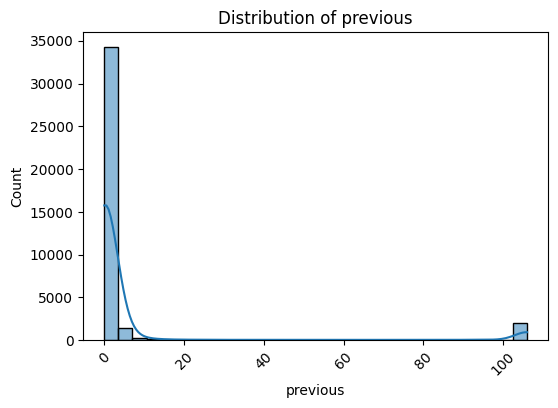

In [5]:
# Step 2: Data Type Check
data_types = train_df.dtypes

# Step 3: Descriptive Statistics (for numerical columns)
numerical_stats = train_df.describe()

# Step 4: Univariate Analysis
# 4.1. Numerical Columns Distribution
def plot_distribution(df, numerical_columns):
    # Exclude non-numerical columns (like 'last contact date')
    numerical_columns = [col for col in numerical_columns if np.issubdtype(df[col].dtype, np.number)]
    
    for col in numerical_columns:
        plt.figure(figsize=(6, 4))
        
        # Clip extreme values (optional but helpful for large datasets)
        lower_limit = df[col].quantile(0.05)
        upper_limit = df[col].quantile(0.95)
        df_col_clipped = df[col].clip(lower=lower_limit, upper=upper_limit)
        
        # Plot histogram with KDE
        sns.histplot(df_col_clipped, kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        
        # Adjust x-axis limits to focus on the majority of data (avoid extreme values)
        min_val, max_val = df_col_clipped.min(), df_col_clipped.max()
        padding = (max_val - min_val) * 0.05
        plt.xlim(min_val - padding, max_val + padding)
        
        # Optionally, rotate x-axis labels to avoid overlap
        plt.xticks(rotation=45)
        
        # Display the plot
        plt.show()

# Get the numerical columns (excluding 'last contact date' column)
numerical_columns = train_df.select_dtypes(include=np.number).columns
plot_distribution(train_df, numerical_columns)

## 3.3  HEATMAP for the numerical columns

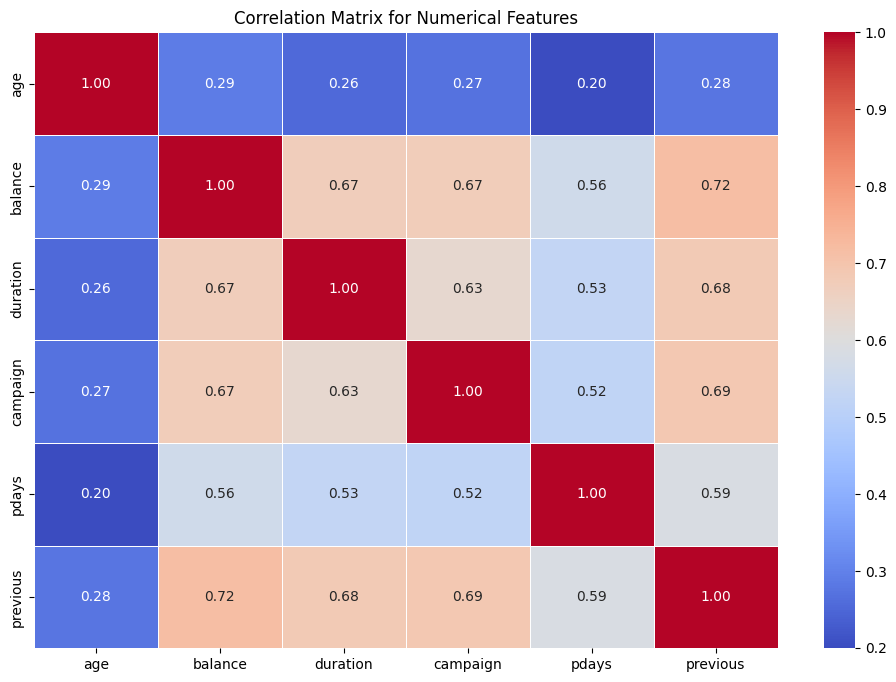

In [6]:
# Step 6: Correlation Analysis for Numerical Features
# Get the numerical columns
numerical_columns = train_df.select_dtypes(include=np.number).columns

# Compute the correlation matrix for numerical columns
correlation_matrix = train_df[numerical_columns].corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix for Numerical Features")
plt.show()


## 3.4  Distribution of target variable

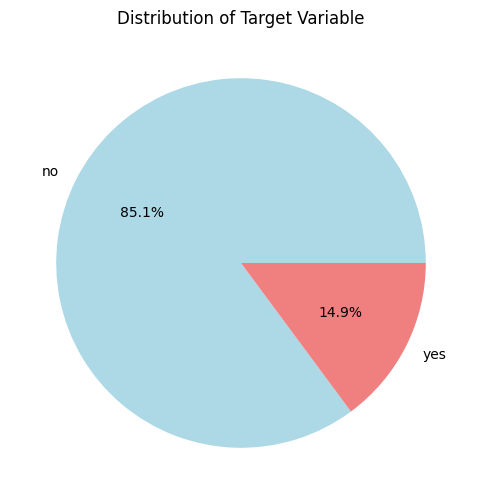

In [7]:
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
train_df['target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.show()


## 3.5 Job vs Education contingency table

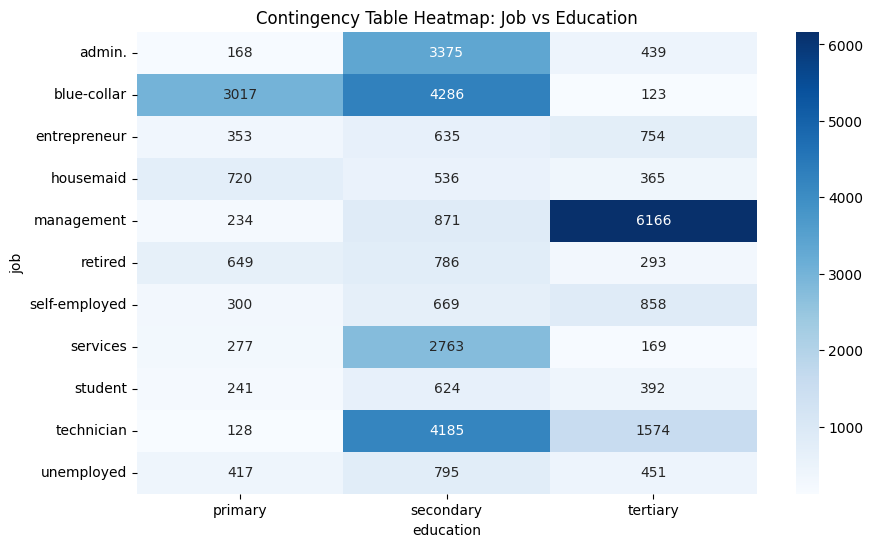

In [8]:
# Create a contingency table for two categorical columns (e.g., 'job' and 'education')
crosstab = pd.crosstab(train_df['job'], train_df['education'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Contingency Table Heatmap: Job vs Education')
plt.show()

## 3.6 Job vs Marital Status

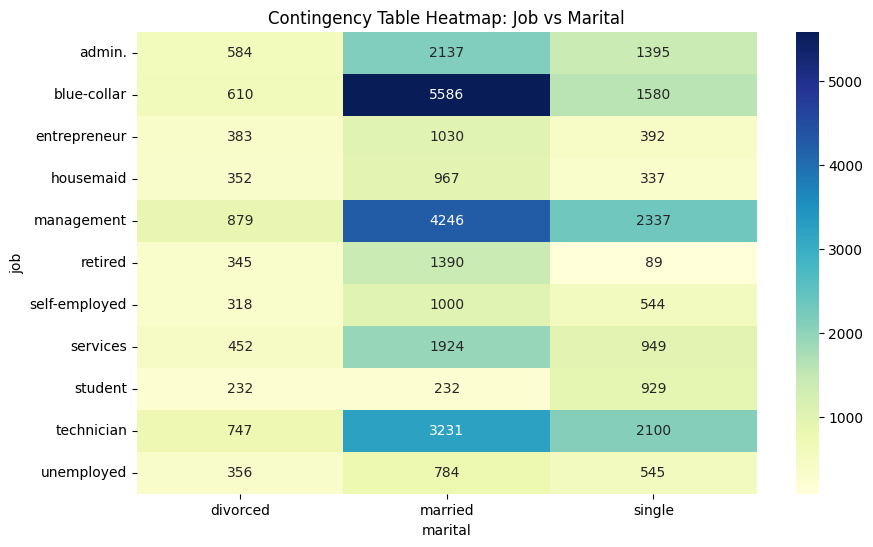

In [9]:
# Create a contingency table for 'job' and 'marital'
crosstab = pd.crosstab(train_df['job'], train_df['marital'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Contingency Table Heatmap: Job vs Marital')
plt.show()


# 4. Data Preprocessing
We will clean the data by handling missing values, encoding categorical features, and normalizing/standardizing numerical features if necessary.



## 4.1 Handling date, missing values and creating bins

In [10]:
# Combine train and test data for consistent label encoding
combined_df = pd.concat([train_df, df_test], keys=['train', 'test'])

# Step 6: Handle Date Columns (If Present)
date_columns = [col for col in combined_df.columns if 'date' in col.lower()]  # Identify columns with 'date' in their name

for date_col in date_columns:
    print(f"Processing date column: {date_col}")
    combined_df[date_col] = pd.to_datetime(combined_df[date_col], errors='coerce')
    combined_df[f'{date_col}_year'] = combined_df[date_col].dt.year
    combined_df[f'{date_col}_month'] = combined_df[date_col].dt.month
    combined_df[f'{date_col}_day'] = combined_df[date_col].dt.day
    combined_df[f'{date_col}_days_since'] = (pd.to_datetime('today') - combined_df[date_col]).dt.days
    combined_df.drop(date_col, axis=1, inplace=True)

# Step 7: Handle Missing Values (Imputation)
numerical_cols = combined_df.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='median')
combined_df[numerical_cols] = imputer.fit_transform(combined_df[numerical_cols])

categorical_cols = combined_df.select_dtypes(include=[object]).columns
imputer_cat = SimpleImputer(strategy='most_frequent')
combined_df[categorical_cols] = imputer_cat.fit_transform(combined_df[categorical_cols])

age_bins = [0, 18, 30, 40, 50, 60, 100]  # Define the bin edges
age_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']  # Define the bin labels
combined_df['age_binned'] = pd.cut(combined_df['age'], bins=age_bins, labels=age_labels, right=False)

Processing date column: last contact date


## 4.2 Using Pipeline object encode, split and scale the data

In [11]:
# Step 8: Label Encoding for Categorical Features
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'target','age_binned']
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous'] + \
                 [col for col in combined_df.columns if 'days_since' in col]
# Create a custom transformer for LabelEncoding
class LabelEncoderTransformer:
    def fit(self, X, y=None):
        self.label_encoders = {col: LabelEncoder() for col in categorical_columns}
        for col in categorical_columns:
            self.label_encoders[col].fit(X[col].astype(str))
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for col, encoder in self.label_encoders.items():
            X_transformed[col] = encoder.transform(X[col].astype(str))
        return X_transformed

# Function to split data into train and test using .xs method
def split_data(X):
    # Perform the split
    train_df = X.xs('train')
    df_test= X.xs('test')
    
    # Create additional feature 'pdays_contacted' for train and test sets
    train_df['pdays_contacted'] = (train_df['pdays'] != -1).astype(int)
    df_test['pdays_contacted'] = (df_test['pdays'] != -1).astype(int)
    
    # Return both dataframes
    return {'train': train_df, 'test': df_test}



# Create a transformer for RobustScaler on numerical columns
class RobustScalerTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.robust_scaler = RobustScaler()
        return self

    def transform(self, X):
        # Extract train and test dataframes
        train_df = X['train']
        df_test = X['test']
        
        # Apply RobustScaler to numerical columns
        train_df[numerical_cols] = self.robust_scaler.fit_transform(train_df[numerical_cols])
        df_test[numerical_cols] = self.robust_scaler.transform(df_test[numerical_cols])
        
        # Return the transformed dataframes
        return {'train': train_df, 'test': df_test}

# Define the pipeline
pipeline = Pipeline([
    ('label_encoder', LabelEncoderTransformer()),  # Apply label encoding
    ('splitter_and_feature_creation', FunctionTransformer(split_data)), # Split and create additional features
    ('scaler', RobustScalerTransformer())
])

# Assuming combined_df is your DataFrame
pipeline.fit(combined_df)  # Fit the pipeline to your DataFrame

# Apply the transformations: Label encoding, splitting, and feature creation
result = pipeline.transform(combined_df)
train_df = result['train']  # This is a DataFrame with the new feature and scaling applied
df_test = result['test'] 




'''
1. split_data function
Splits data into train and test sets using .xs method.
Adds a new feature pdays_contacted (1 if pdays ≠ -1, otherwise 0) to both sets.
Returns a dictionary with the train and test DataFrames.
2. RobustScalerTransformer class
Scales numerical columns using RobustScaler.
fit initializes the scaler, and transform applies scaling to the train (fit_transform) and test (transform) sets.
3. Pipeline
Steps:
Encodes categorical labels (LabelEncoderTransformer).
Splits data and adds pdays_contacted (split_data).
Scales numerical columns (RobustScalerTransformer).
Usage: Fits the entire pipeline to combined_df.
'''

/tmp/ipykernel_23/2487020952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['pdays_contacted'] = (train_df['pdays'] != -1).astype(int)
/tmp/ipykernel_23/2487020952.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pdays_contacted'] = (df_test['pdays'] != -1).astype(int)
/tmp/ipykernel_23/2487020952.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

'\n1. split_data function\nSplits data into train and test sets using .xs method.\nAdds a new feature pdays_contacted (1 if pdays ≠ -1, otherwise 0) to both sets.\nReturns a dictionary with the train and test DataFrames.\n2. RobustScalerTransformer class\nScales numerical columns using RobustScaler.\nfit initializes the scaler, and transform applies scaling to the train (fit_transform) and test (transform) sets.\n3. Pipeline\nSteps:\nEncodes categorical labels (LabelEncoderTransformer).\nSplits data and adds pdays_contacted (split_data).\nScales numerical columns (RobustScalerTransformer).\nUsage: Fits the entire pipeline to combined_df.\n'

# 5. Model Building
In this section, we will build machine learning models using algorithms like Random Forest, XGBoost, etc., and train them on the dataset.



## 5.1 Splitting data into training and test

In [12]:




# Accessing the resulting train and test DataFrames
#train_df = result['train']  # This is a DataFrame with the new feature
#df_test = result['test']    # This is a DataFrame with the new feature
   # This is a DataFrame# Get the transformed DataFrame with encoded labels


# Step 13: Prepare Training Data for Modeling
X = train_df.drop(['target'], axis=1)
y = train_df['target']

# Step 14: Handle Class Imbalance (SMOTE for oversampling)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 15: Split the resampled data
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


'''
Step 13:

Separates the target variable ('target') from the features in the training dataset (train_df).
X: Features used for modeling.
y: The target variable to predict.
Step 14 (SMOTE):

Uses Synthetic Minority Oversampling Technique (SMOTE) to handle class imbalance in the target variable.
Generates synthetic samples for the minority class, creating a balanced dataset (X_resampled and y_resampled).
Step 15 (Split Data):

Splits the resampled data into training and validation sets using train_test_split.
X_train and y_train: Training data used to fit the model.
X_val and y_val: Validation data to evaluate the model's performance.
Why is it useful?
Class Imbalance Handling: SMOTE helps the model learn effectively by ensuring both classes are well-represented in the training data, avoiding bias toward the majority class.
Validation Split: Provides a separate set of data to test the model during training, reducing overfitting and ensuring better generalization.'''

"\nStep 13:\n\nSeparates the target variable ('target') from the features in the training dataset (train_df).\nX: Features used for modeling.\ny: The target variable to predict.\nStep 14 (SMOTE):\n\nUses Synthetic Minority Oversampling Technique (SMOTE) to handle class imbalance in the target variable.\nGenerates synthetic samples for the minority class, creating a balanced dataset (X_resampled and y_resampled).\nStep 15 (Split Data):\n\nSplits the resampled data into training and validation sets using train_test_split.\nX_train and y_train: Training data used to fit the model.\nX_val and y_val: Validation data to evaluate the model's performance.\nWhy is it useful?\nClass Imbalance Handling: SMOTE helps the model learn effectively by ensuring both classes are well-represented in the training data, avoiding bias toward the majority class.\nValidation Split: Provides a separate set of data to test the model during training, reducing overfitting and ensuring better generalization."

## 5.2 Using Xgboost with Hyper parameters tuned through randomized search 

In [13]:
# Step 16: Hyperparameter tuning with RandomizedSearchCV for XGBoost


param_dist_xgb = {
    'max_depth': [3, 5, 7],  # Keep range small for simpler models
    'min_child_weight': [5, 10, 15],  # Increased for conservativeness
    'learning_rate': [0.005, 0.01, 0.03],  # Smaller for slower learning
    'n_estimators': [200, 300, 500],  # Increased to pair with lower learning rates
    'subsample': [0.6, 0.7, 0.8],  # Reduced to prevent overfitting
    'colsample_bytree': [0.5, 0.7, 0.8],  # Reduced to prevent overfitting
    'reg_lambda': [10, 20, 50],  # Increased regularization (L2)
    'reg_alpha': [0, 5, 10],  # Increased regularization (L1)
    'scale_pos_weight': [1],  # Only relevant for imbalanced data
    'gamma': [0, 0.1, 0.5, 1],  # Minimum loss reduction for split
    'max_delta_step': [0, 1, 2],  # Stabilize imbalanced training
}
'''
max_depth: Limits how deep each tree can grow. Shallower trees prevent overfitting.
min_child_weight: Ensures splits only happen if there's enough data, making the model more cautious.
learning_rate: Controls how much the model adjusts with each step. Smaller values mean slower, more precise learning.
n_estimators: Sets how many trees the model builds. More trees improve learning with smaller learning_rate.
subsample: Uses only a part of the data for each tree to add randomness and avoid overfitting.
colsample_bytree: Uses only a part of the features for each tree to reduce overfitting.
reg_lambda: Adds a penalty to large weights to keep the model simpler (L2 regularization).
reg_alpha: Shrinks unnecessary features to zero for simplicity (L1 regularization).
scale_pos_weight: Balances the importance of classes if the dataset is imbalanced (e.g., more negatives than positives).
gamma: Makes splitting more conservative by requiring a certain amount of improvement to split a tree.
max_delta_step: Stabilizes the training process, especially for imbalanced data.'''

# RandomizedSearchCV with early stopping and reduced iterations
random_search_xgb = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'),
    param_distributions=param_dist_xgb,
    n_iter=30,  # Reduced iterations for faster tuning
    cv=3,  # Use 3-fold cross-validation to speed up the search process
    verbose=0,  # Set verbose to 0 to suppress unnecessary log outputs
    n_jobs=-1,  # Parallelize across all CPU cores
    scoring='accuracy',  # Use accuracy as the scoring metric
    random_state=42
)

'''
estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss'):

Specifies the model to tune, an XGBoost classifier for binary classification.
objective='binary:logistic': Indicates it’s solving a binary classification problem using logistic regression.
eval_metric='logloss': Uses log loss to evaluate how well the model predicts probabilities.
param_distributions=param_dist_xgb:

The list of hyperparameters (like max_depth, learning_rate, etc.) that the RandomizedSearchCV will test combinations of.
n_iter=30:

Limits the search to 30 random parameter combinations to save time.
cv=3:

Uses 3-fold cross-validation, splitting the data into 3 parts to test how well the model generalizes.
verbose=0:

Suppresses unnecessary log outputs to keep the output clean.
n_jobs=-1:

Runs the process using all available CPU cores to speed up the search.
scoring='accuracy':

Measures the performance of each parameter combination using accuracy as the metric.
random_state=42:

Ensures reproducibility by making the random parameter selection consistent every time you run it.'''

# Fit with early stopping to avoid overfitting
random_search_xgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],  # Use validation set for early stopping
    early_stopping_rounds=10,  # Stop training if no improvement for 10 rounds
    verbose=False  # Disable verbose output to keep things clean
)
'''
eval_set=[(X_val, y_val)]:

This is a separate set of data that the model doesn't train on but uses to check its performance while learning. It helps to see if the model is improving.
early_stopping_rounds=10:

If the model’s performance doesn’t improve for 10 rounds, training stops early. This prevents wasting time and stops the model from overfitting to the training data.
verbose=False:

This just keeps things quiet during training by turning off extra details in the output. You won’t see a lot of log messages unless there's an error.'''

# Get the best model
best_model_xgb = random_search_xgb.best_estimator_

/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`se

 ## 5.3 Using Logistic Regression with Hyper parameters tuned through randomized search 

In [14]:

# Step 17: Hyperparameter tuning for Logistic Regression
param_dist_lr = {
    'C': uniform(0.001, 10),  # Regularization strength
    'penalty': ['l2'],  # Regularization type
    'solver': ['lbfgs', 'liblinear']  # Solvers
}

'''
param_dist_lr = {}:
This dictionary defines the hyperparameters for the Logistic Regression model that you want to tune using RandomizedSearchCV.
These hyperparameters control how the model is trained and optimized.

'C': uniform(0.001, 10):

What it is: C is the regularization strength in logistic regression. The uniform(0.001, 10) function generates random values for
C between 0.001 and 10.
How it works: A small C means more regularization (less complex model), and a large C means less regularization (more complex model).
This hyperparameter helps find the balance between underfitting and overfitting.
'penalty': ['l2']:

What it is: Specifies the type of regularization used. 'l2' means Ridge regularization, which penalizes large coefficients
in the model to avoid overfitting.
How it works: Regularization helps to control the complexity of the model and prevents it from fitting noise in the data.
'solver': ['lbfgs', 'liblinear']:

What it is: The solvers are the algorithms used to find the optimal coefficients for the model.
How it works:
'lbfgs': A robust solver that works well for large datasets.
'liblinear': A solver that is better suited for smaller datasets and supports l1 regularization.'''
random_search_lr = RandomizedSearchCV(estimator=LogisticRegression(max_iter=1000, random_state=42),
                                      param_distributions=param_dist_lr,
                                      n_iter=10,
                                      cv=5,
                                      verbose=1,
                                      n_jobs=-1,
                                      scoring='accuracy',
                                      random_state=42)

'''
estimator=LogisticRegression(max_iter=1000, random_state=42):

What it is: Defines the logistic regression model to be tuned. max_iter=1000 means the model
can iterate up to 1000 times to find the best solution, and random_state=42 ensures that the results are reproducible.
param_distributions=param_dist_lr:

What it is: Passes the hyperparameter options (param_dist_lr) defined earlier for the search to use.
n_iter=10:

What it is: The number of random combinations of hyperparameters to try. In this case, it will try 10 different sets of parameters.
cv=5:

What it is: The number of cross-validation folds to use. Here, the data is split into 5 parts, and 
each part is used for validation once while the other 4 parts are used for training.
verbose=1:

What it is: Controls the amount of output. Setting it to 1 gives some output to show progress during the search process.
n_jobs=-1:

What it is: Specifies the number of CPU cores to use for parallel processing. -1 means using all available cores.
scoring='accuracy':

What it is: The metric used to evaluate the model. accuracy means the model’s performance
will be measured based on how many predictions it gets right.
random_state=42:

What it is: A fixed random seed that ensures the results are reproducible across runs.'''



random_search_lr.fit(X_train, y_train)
best_model_lr = random_search_lr.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

## 5.3 Using Random Forest with Hyper parameters tuned through randomized search 

In [15]:
# Step 18: Hyperparameter tuning for Random Forest
param_dist_rf = {
    'n_estimators': randint(100, 300),  # Number of trees in the forest
    'max_depth': randint(10, 50),  # Maximum depth of each tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split a node
    'min_samples_leaf': randint(1, 10)  # Minimum number of samples required at a leaf node
}

'''
'n_estimators': Specifies the number of trees in the forest, chosen randomly between 100 and 300. 
More trees generally improve model performance but increase computation time.

'max_depth': Defines the maximum depth of each decision tree, chosen randomly between 10 and 50. 
A higher value allows deeper trees to capture more details but may lead to overfitting.

'min_samples_split': The minimum number of samples required to split an internal node, chosen randomly between 2 and 10. 
This controls how sensitive the tree is to splitting and helps prevent overfitting.

'min_samples_leaf': The minimum number of samples required at each leaf node, chosen randomly between 1 and 10. 
Increasing this value makes the tree more generalized and prevents overfitting.
'''

# Define RandomizedSearchCV with the RandomForestClassifier
random_search_rf = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, class_weight='balanced'),  # Handle imbalanced classes
    param_distributions=param_dist_rf,  # The hyperparameter search space
    n_iter=10,  # Number of random configurations to test (this can be adjusted)
    cv=5,  # Stratified 5-fold cross-validation (default for classification)
    verbose=1,  # Display progress
    n_jobs=-1,  # Use all available CPU cores
    scoring='roc_auc',  # Use ROC AUC score (better for imbalanced datasets)
    random_state=42
)
'''
estimator=RandomForestClassifier(random_state=42, class_weight='balanced'):

Defines the model to be tuned, which is a Random Forest Classifier.
random_state=42 ensures reproducibility of results.
class_weight='balanced' adjusts for imbalanced classes by giving more weight to the underrepresented classes.
param_distributions=param_dist_rf:

Specifies the range of hyperparameters to be tested. This is the dictionary (param_dist_rf) that contains 
different values for hyperparameters like n_estimators, max_depth, etc.
n_iter=10:

Sets the number of random configurations to test. In this case, it will randomly sample 10 combinations 
from the hyperparameter space.
cv=5:

Specifies 5-fold cross-validation for model evaluation. This means the data will be split into 5 parts, 
and the model will be trained and tested 5 times, each time using a different fold as the test set.
verbose=1:

Controls the amount of output shown during the search process. verbose=1 will display progress, 
showing how many combinations have been tested.
n_jobs=-1:

Uses all available CPU cores to run the search process in parallel, speeding up the tuning.
scoring='roc_auc':

Uses the ROC AUC score to evaluate model performance. This is a good choice for imbalanced datasets,
as it focuses on the trade-off between true positive and false positive rates.
random_state=42:

Ensures reproducibility by controlling the randomness in the search process.'''
# Fit the model to the training data
random_search_rf.fit(X_train, y_train)

# Get the best model from the random search
best_model_rf = random_search_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


# 6. Model Comparision and evaluation

Logistic Regression Accuracy: 0.8055
Random Forest Accuracy: 0.9252
XGBoost Accuracy: 0.9137

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.84      0.81      6548
           1       0.83      0.78      0.80      6806

    accuracy                           0.81     13354
   macro avg       0.81      0.81      0.81     13354
weighted avg       0.81      0.81      0.81     13354


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      6548
           1       0.90      0.96      0.93      6806

    accuracy                           0.93     13354
   macro avg       0.93      0.92      0.93     13354
weighted avg       0.93      0.93      0.93     13354


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      6548
           1      

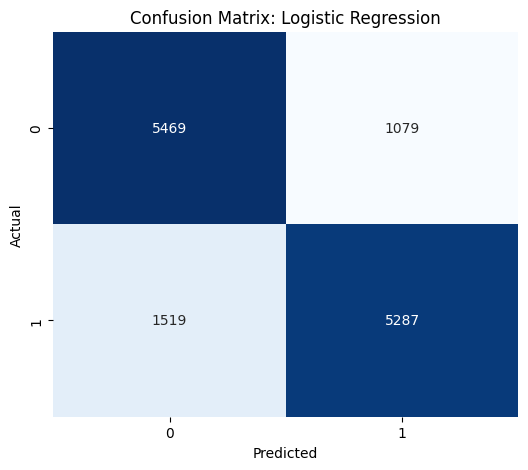

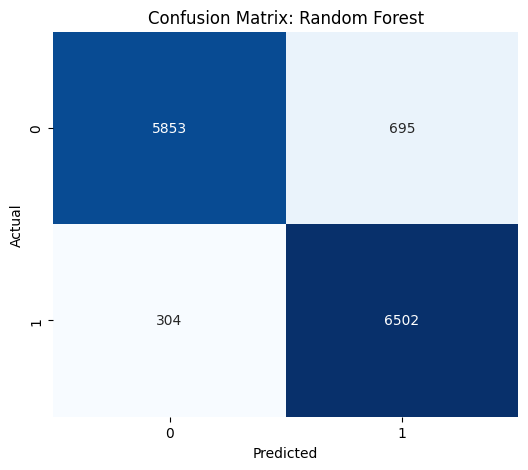

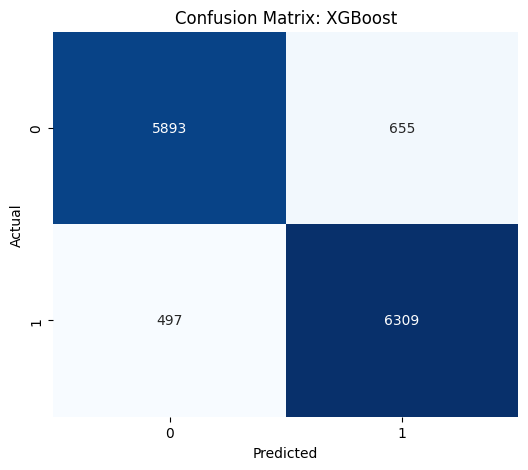

Logistic Regression Cross-Validation Accuracy: 0.8079
Random Forest Cross-Validation Accuracy: 0.9184
XGBoost Cross-Validation Accuracy: 0.9124


In [16]:
# Step 19: Train models for comparison: Logistic Regression, Random Forest, XGBoost
y_val_pred_lr = best_model_lr.predict(X_val)
lr_accuracy = accuracy_score(y_val, y_val_pred_lr)

y_val_pred_rf = best_model_rf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)

y_val_pred_xgb = best_model_xgb.predict(X_val)
xgb_accuracy = accuracy_score(y_val, y_val_pred_xgb)

# Step 20: Print performance comparison
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Step 21: Print Classification Reports for all models
print("\nClassification Report for Logistic Regression:")
print(classification_report(y_val, y_val_pred_lr))

print("\nClassification Report for Random Forest:")
print(classification_report(y_val, y_val_pred_rf))

print("\nClassification Report for XGBoost:")
print(classification_report(y_val, y_val_pred_xgb))

# Step 22: Print Confusion Matrices for all models


# Logistic Regression Confusion Matrix
lr_cm = confusion_matrix(y_val, y_val_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_val, y_val_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# XGBoost Confusion Matrix
xgb_cm = confusion_matrix(y_val, y_val_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




# Step 24: Cross-Validation Scores ( useful for comparison)
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(best_model_lr, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {lr_cv_scores.mean():.4f}")

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean():.4f}")

# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(best_model_xgb, X_train, y_train, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean():.4f}")


In [17]:
import pandas as pd
from sklearn.metrics import classification_report

# Generate classification reports for each model (output_dict=True converts to a dictionary)
report_lr = classification_report(y_val, y_val_pred_lr, output_dict=True)
report_rf = classification_report(y_val, y_val_pred_rf, output_dict=True)
report_xgb = classification_report(y_val, y_val_pred_xgb, output_dict=True)

# Convert the classification report dictionaries into DataFrames
df_lr = pd.DataFrame(report_lr).transpose()
df_rf = pd.DataFrame(report_rf).transpose()
df_xgb = pd.DataFrame(report_xgb).transpose()

# Keep only the 'accuracy' and 'macro avg' rows (ignoring individual class reports)
df_lr = df_lr[['precision', 'recall', 'f1-score']].loc[['accuracy', 'macro avg']]
df_rf = df_rf[['precision', 'recall', 'f1-score']].loc[['accuracy', 'macro avg']]
df_xgb = df_xgb[['precision', 'recall', 'f1-score']].loc[['accuracy', 'macro avg']]

# Add a 'Model' column to each DataFrame for clarity
df_lr['Model'] = 'Logistic Regression'
df_rf['Model'] = 'Random Forest'
df_xgb['Model'] = 'XGBoost'

# Concatenate the DataFrames into one table
df_combined = pd.concat([df_lr, df_rf, df_xgb], axis=0)

# Round the metrics columns to 2 decimal places
df_combined[['precision', 'recall', 'f1-score']] = df_combined[['precision', 'recall', 'f1-score']].round(2)

# Display the resulting table
print(df_combined.to_string(index=False))


 precision  recall  f1-score               Model
      0.81    0.81      0.81 Logistic Regression
      0.81    0.81      0.81 Logistic Regression
      0.93    0.93      0.93       Random Forest
      0.93    0.92      0.93       Random Forest
      0.91    0.91      0.91             XGBoost
      0.91    0.91      0.91             XGBoost


In [18]:



# Step 19: Train models for comparison: Logistic Regression, Random Forest, XGBoost
y_val_pred_lr = best_model_lr.predict(X_val)
lr_accuracy = accuracy_score(y_val, y_val_pred_lr)

y_val_pred_rf = best_model_rf.predict(X_val)
rf_accuracy = accuracy_score(y_val, y_val_pred_rf)

y_val_pred_xgb = best_model_xgb.predict(X_val)
xgb_accuracy = accuracy_score(y_val, y_val_pred_xgb)

# Step 20: Print performance comparison
print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

X_test_final = df_test[X.columns] 

X_test_final = df_test[X.columns] 

# Step 22: Predict on the test data
#predictions_lr = best_model_lr.predict(X_test_final)
predictions_rf = best_model_rf.predict(X_test_final)
predictions_xgb = best_model_xgb.predict(X_test_final)



# Convert numeric predictions back to 'yes'/'no'
#predictions_final_lr = np.where(predictions_lr == 1, 'yes', 'no')
predictions_final_rf = np.where(predictions_rf == 1, 'yes', 'no')
#predictions_final_xgb = np.where(predictions_xgb == 1, 'yes', 'no')


# Step 23: Save the predictions in DataFrames for each model
#submission_lr = pd.DataFrame({
#    'id': df_test.index,
 #   'target': predictions_final_lr
#})

submission = pd.DataFrame({
    'id': df_test.index,
    'target': predictions_final_rf
})

#submission_xgb = pd.DataFrame({
#    'id': df_test.index,
#    'target': predictions_final_xgb
#})

# Step 24: Save the submissions as CSV files
def save_submission_to_csv(submission_df, file_name):
    submission_df.to_csv(file_name, index=False)
    print(f"Submission saved to {file_name}")

# Save all three submissions
#save_submission_to_csv(submission_lr, 'submission_lr.csv')

#save_submission_to_csv(submission_xgb, 'submission_xgb.csv')
save_submission_to_csv(submission, 'submission.csv')

from IPython.display import HTML

# Create a download link for each submission file
def create_download_link(file_path, file_name="Download"):
    return f'<a href="{file_path}" download>{file_name}</a>'

# Display download links for all three files
#link_lr = create_download_link('submission_lr.csv', "Click here to download Logistic Regression predictions")

#link_xgb = create_download_link('submission_xgb.csv', "Click here to download XGBoost predictions")

#link_rf = create_download_link('submission_rf.csv', "Click here to download Random Forest predictions")

# Display all links
#HTML(f"{link_lr}<br>{link_rf}<br>{link_xgb}")






Logistic Regression Accuracy: 0.8055
Random Forest Accuracy: 0.9252
XGBoost Accuracy: 0.9137
Submission saved to submission.csv
